In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
!pip install xgboost
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [4]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\Uday\Machine Learning\Loan Approval\loan_data_set.csv')

In [6]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [20]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


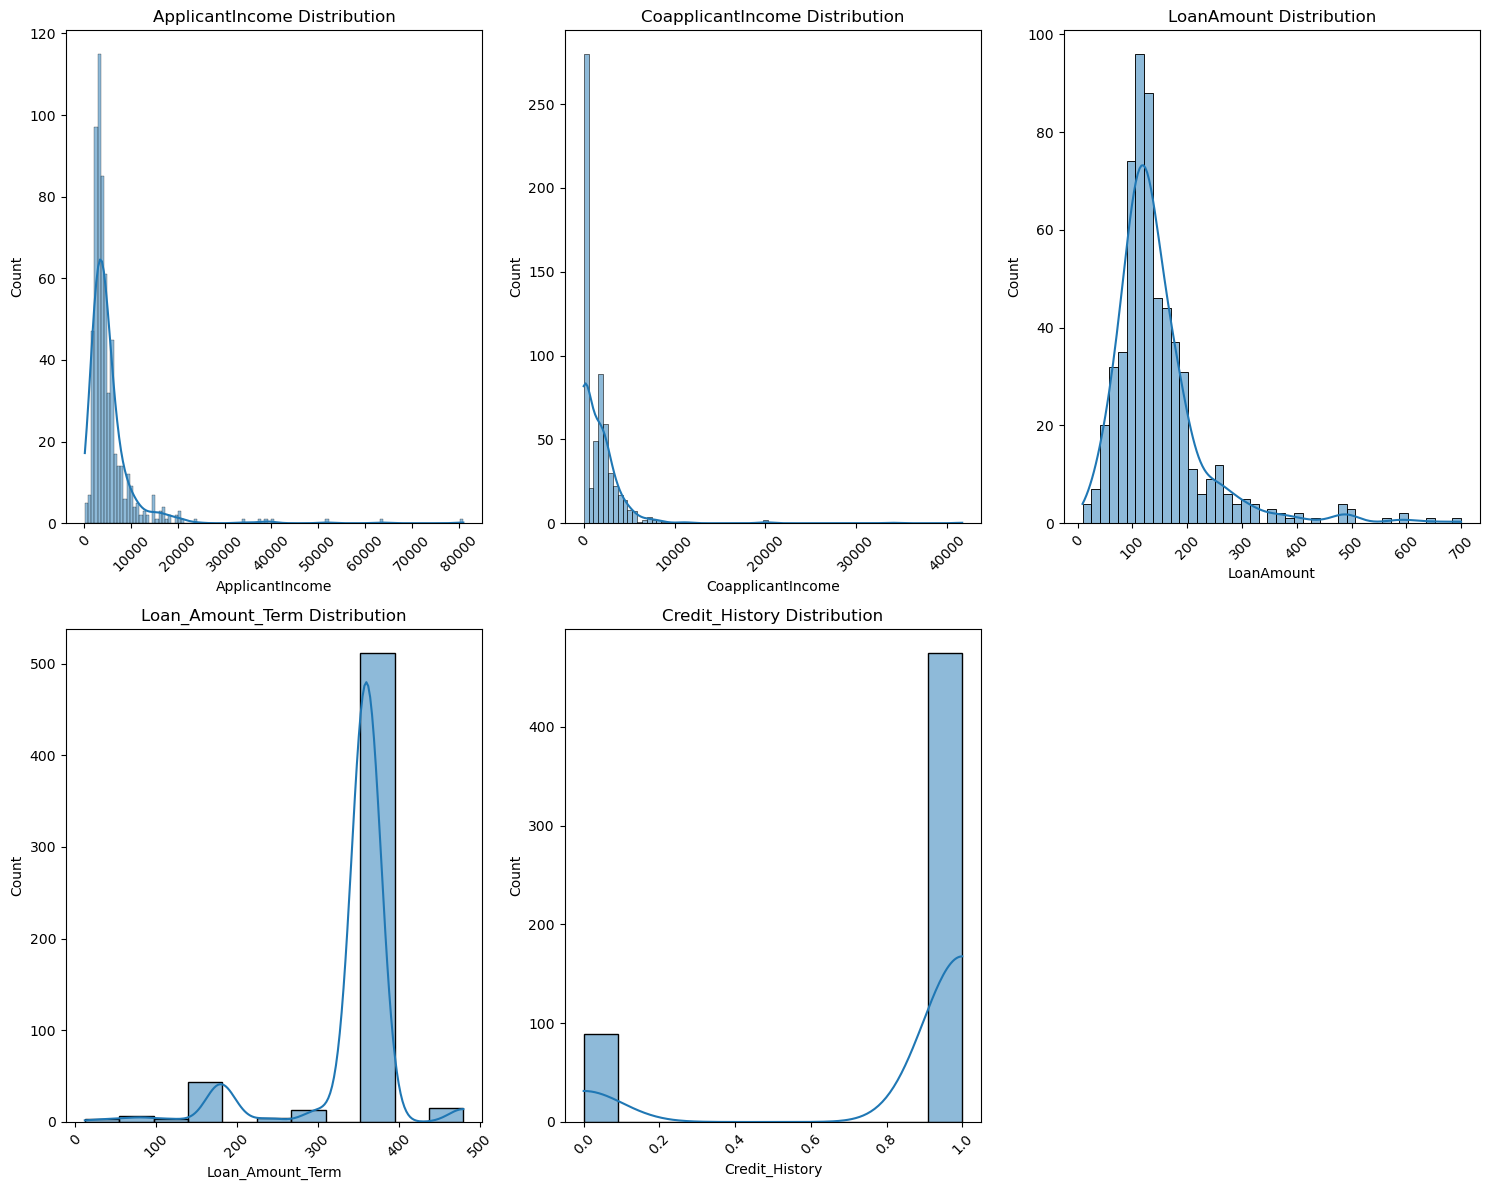

In [22]:
Numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                'Loan_Amount_Term', 'Credit_History']

# Adjust figure size
plt.figure(figsize=(15, 12))  

for i, col in enumerate(Numeric_cols):
    plt.subplot(2, 3, i+1)  # Create subplots in a 3x3 grid
    sns.histplot(data=df, x=col, kde=True)  # Add KDE for better distribution visualization
    plt.title(f'{col} Distribution')  # Title for each subplot
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

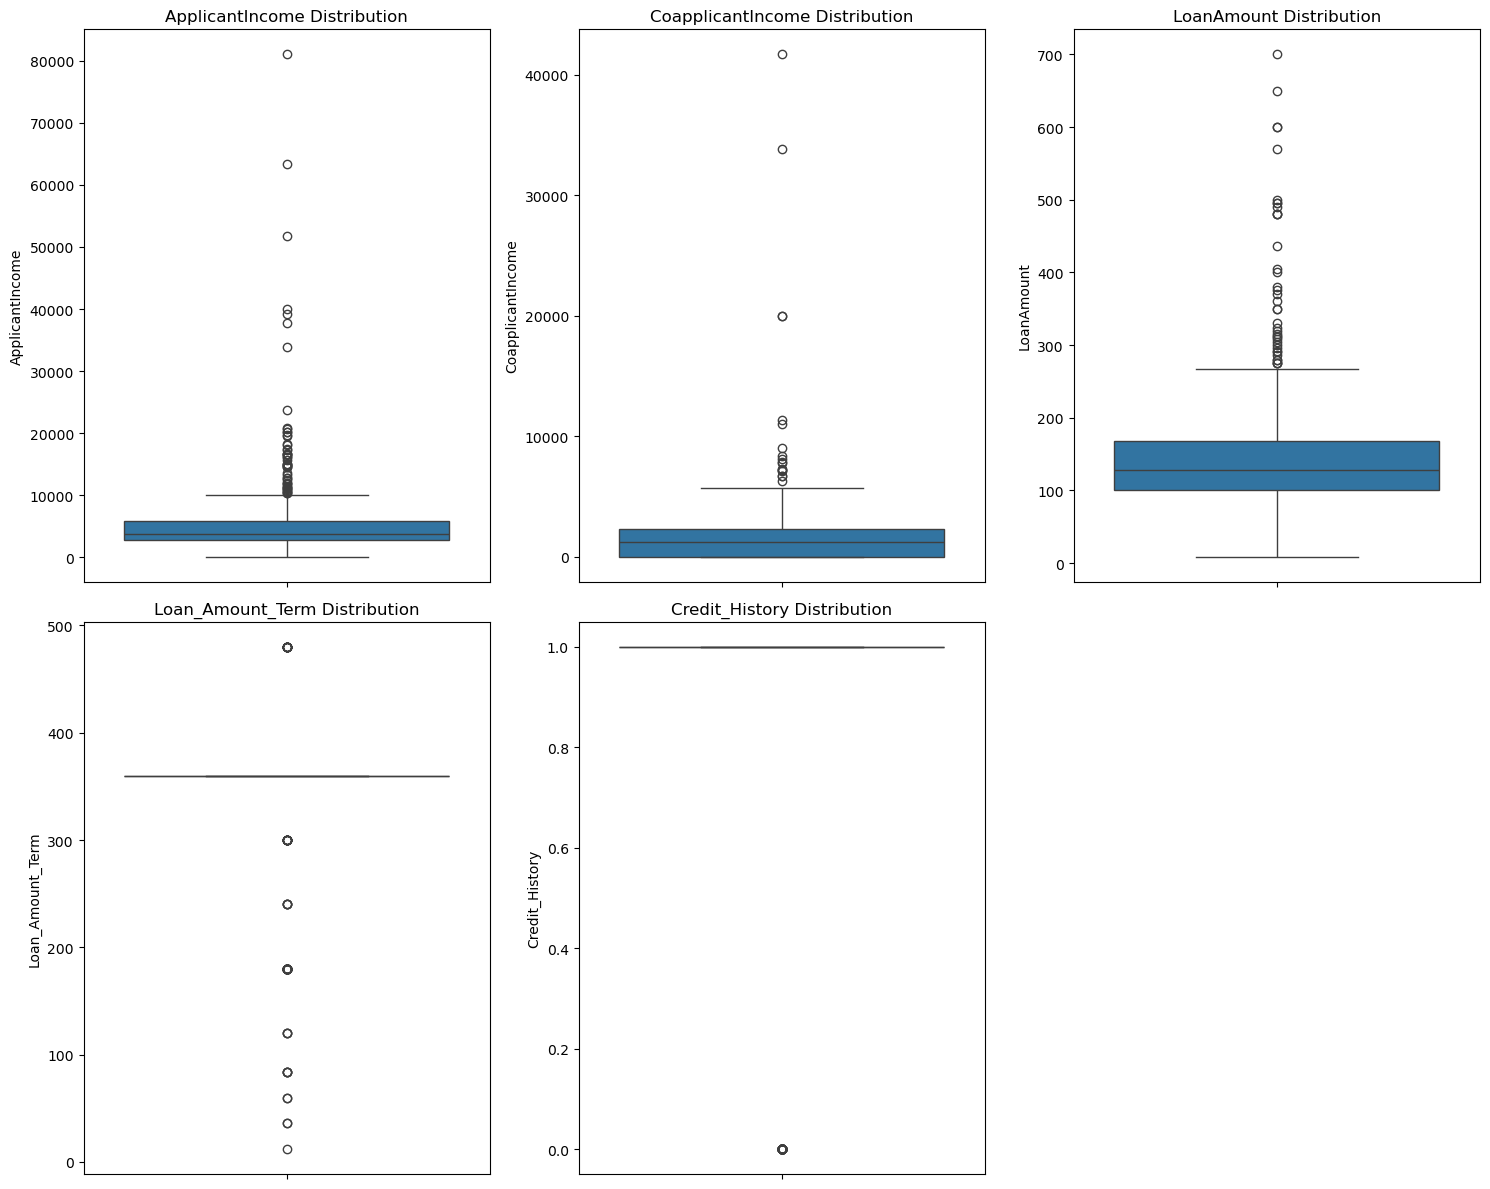

In [38]:
Numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                'Loan_Amount_Term', 'Credit_History']

# Adjust figure size
plt.figure(figsize=(15, 12))  

for i, col in enumerate(Numeric_cols):
    plt.subplot(2, 3, i+1)  # Create subplots in a 3x3 grid
    sns.boxplot(data=df, y=col)  # Add KDE for better distribution visualization
    plt.title(f'{col} Distribution')  # Title for each subplot
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

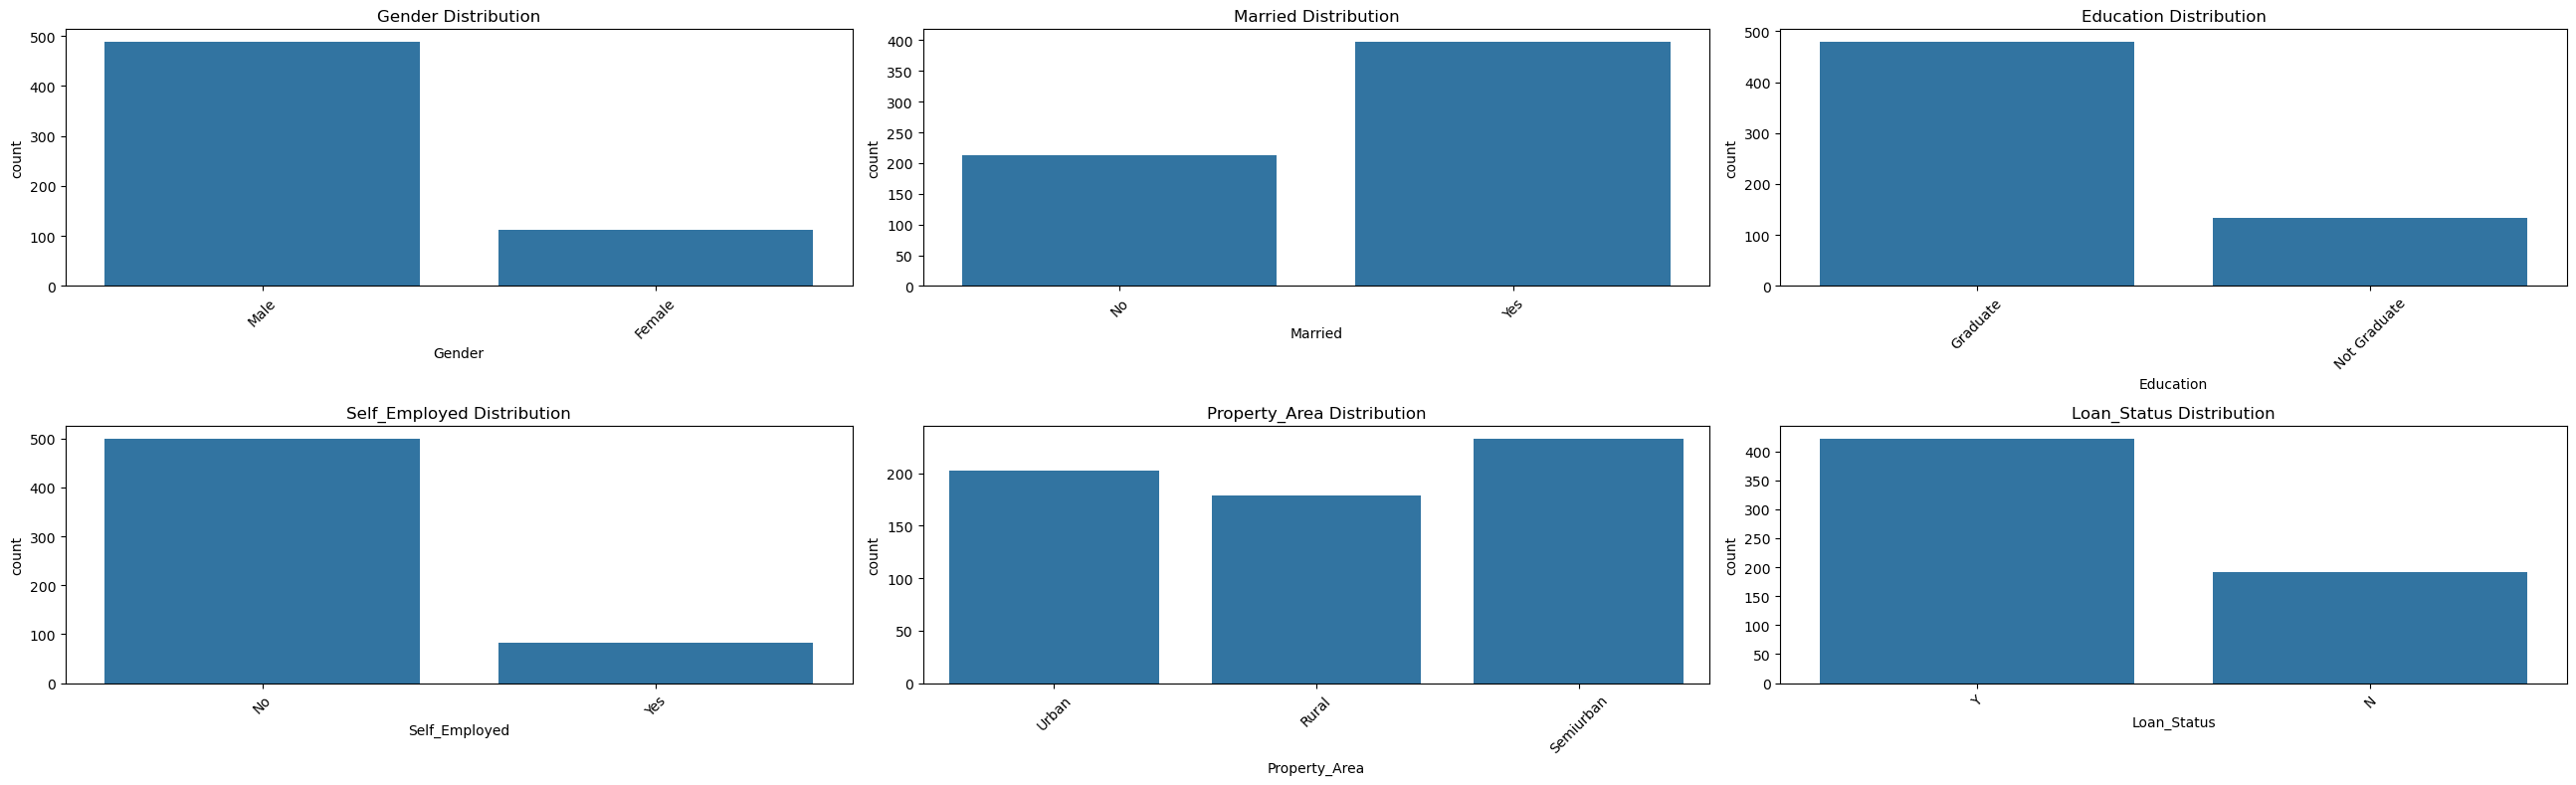

In [46]:
Numeric_cols = ['Gender', 'Married', 
                'Education', 'Self_Employed','Property_Area','Loan_Status']

# Adjust figure size
plt.figure(figsize=(26, 8))  

for i, col in enumerate(Numeric_cols):
    plt.subplot(2, 3, i+1)  # Create subplots in a 1x5 grid
    sns.countplot(data=df, x=col)  # to see outliers
    plt.title(f'{col} Distribution')  # Title for each subplot
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

In [48]:
# change dependent col 3+ to 4 and plot the distrinutoion cuntplot if needed
# remove outliers
# transform data to normal
# remove null values

In [52]:
df.duplicated().sum()

0

In [60]:
df[df.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [66]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [ ]:
# credit history cant fill so droping na rows

In [76]:
df = df.dropna(subset=['Credit_History'])

In [78]:
df.isnull().sum()

Loan_ID               0
Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# replacing na with mode in Loan_Amount_Term col

In [88]:
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

C:\Users\DELL\AppData\Local\Temp\ipykernel_18192\1743723499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])


In [90]:
df.isnull().sum()

Loan_ID               0
Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [92]:
df['Self_Employed']= df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

C:\Users\DELL\AppData\Local\Temp\ipykernel_18192\1659637598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Self_Employed']= df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [94]:
df.isnull().sum()

Loan_ID               0
Gender               12
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [102]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [106]:
Mapping = {'3+': 4}
df['Dependents'].replace(Mapping, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18192\1752178804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dependents'].replace(Mapping, inplace=True)


In [108]:
df['Dependents'].unique()

array(['0', '1', '2', 4, nan], dtype=object)

In [118]:
Mapping = {'1.': 1, '0.':0,'2.':2,'4.':4}
df['Dependents'].replace(Mapping, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18192\3754493662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dependents'].replace(Mapping, inplace=True)


In [120]:
df['Dependents'].unique()

array([ 0.,  1.,  2.,  4., nan])

In [122]:
df['Dependents']= df['Dependents'].fillna(df['Dependents'].mode()[0])

C:\Users\DELL\AppData\Local\Temp\ipykernel_18192\3535200463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dependents']= df['Dependents'].fillna(df['Dependents'].mode()[0])


In [124]:
df.isnull().sum()

Loan_ID               0
Gender               12
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [126]:
df['Dependents'].unique()

array([0., 1., 2., 4.])

In [130]:
df['Dependents']=df['Dependents'].astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18192\6451118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dependents']=df['Dependents'].astype(int)


In [132]:
type(df['Dependents'])

pandas.core.series.Series

In [134]:
df['Dependents']

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    4
611    1
612    2
613    0
Name: Dependents, Length: 564, dtype: int32

<Axes: xlabel='Dependents', ylabel='Count'>

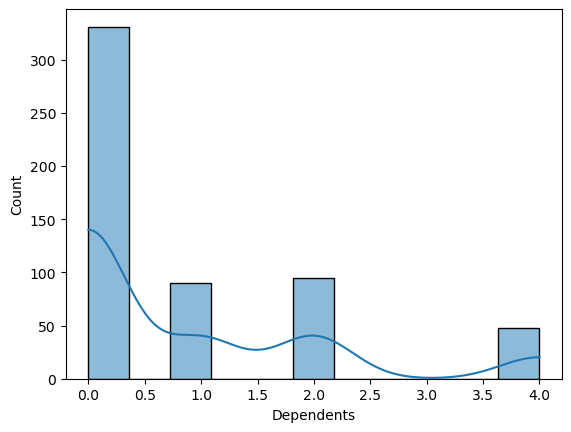

In [140]:
sns.histplot(data=df, x='Dependents', kde=True)

In [142]:
df.isnull().sum()


Loan_ID               0
Gender               12
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [144]:
df['LoanAmount']= df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])

C:\Users\DELL\AppData\Local\Temp\ipykernel_18192\1078356362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LoanAmount']= df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])


In [146]:
df.isnull().sum()

Loan_ID               0
Gender               12
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [152]:
df = df.dropna(subset=['Gender','Married'])

In [154]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            549 non-null    object 
 1   Gender             549 non-null    object 
 2   Married            549 non-null    object 
 3   Dependents         549 non-null    int32  
 4   Education          549 non-null    object 
 5   Self_Employed      549 non-null    object 
 6   ApplicantIncome    549 non-null    int64  
 7   CoapplicantIncome  549 non-null    float64
 8   LoanAmount         549 non-null    float64
 9   Loan_Amount_Term   549 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      549 non-null    object 
 12  Loan_Status        549 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 57.9+ KB


In [158]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


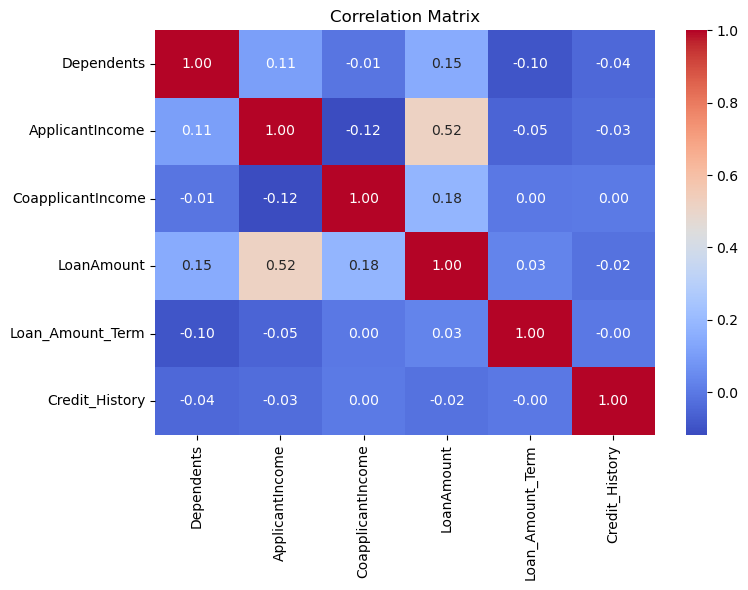

In [160]:
# 1. Correlation Matrix Heatmap

Numeric_cols =  ['Dependents','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                'Loan_Amount_Term', 'Credit_History']

# Compute the correlation matrix
corr_matrix = df[Numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
# we should test withoutliers then compare with tranformation sq and log (log supresses the impact of big values/ outliers more than sq), then 
# we should also test by removing in reality. for this project i am moving forward with removing the outliers. As rest both are iterative and simpler 
# to follw. 

In [180]:
columns_with_outliers = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Copy the original DataFrame to avoid overwriting it
df_clean = df.copy()

# Loop through each column and apply IQR filtering
for col in columns_with_outliers:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]


In [182]:
df_clean.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [190]:
df_clean.shape

(464, 13)

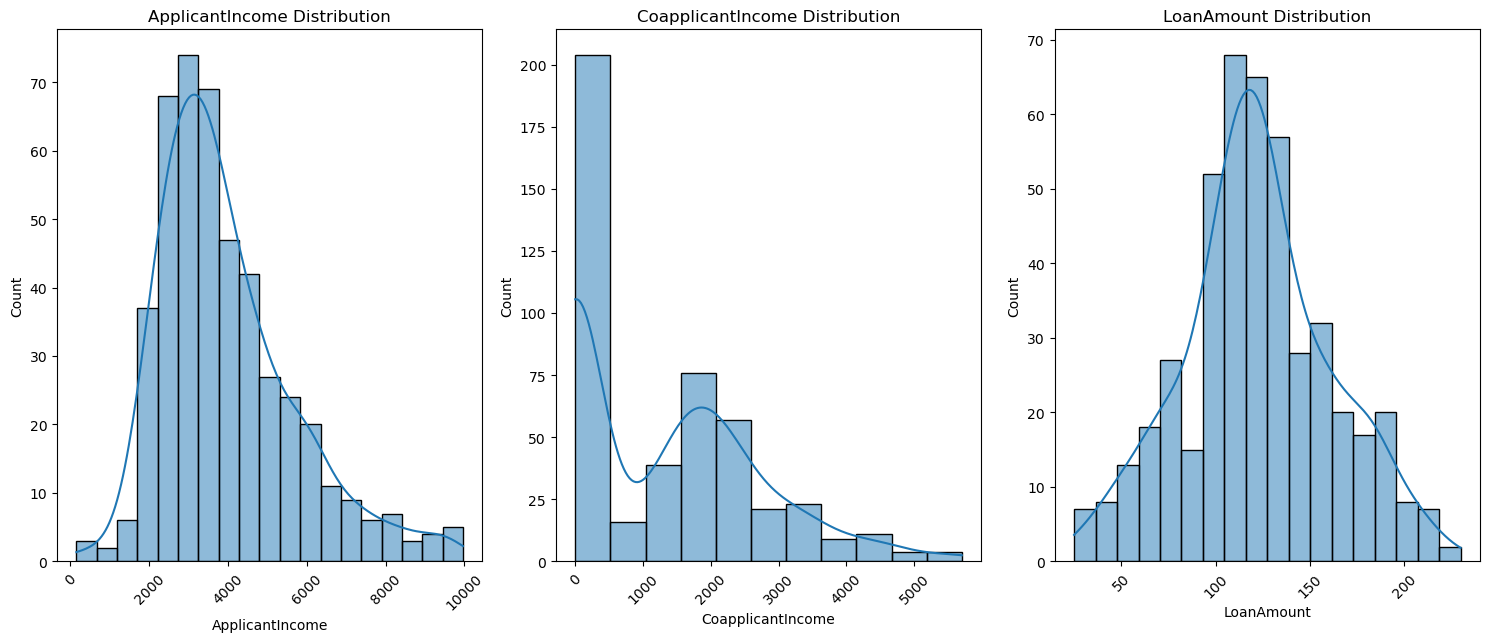

In [184]:
Numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
                

# Adjust figure size
plt.figure(figsize=(15, 12))  

for i, col in enumerate(Numeric_cols):
    plt.subplot(2, 3, i+1)  # Create subplots in a 3x3 grid
    sns.histplot(data=df_clean, x=col, kde=True)  # Add KDE for better distribution visualization
    plt.title(f'{col} Distribution')  # Title for each subplot
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

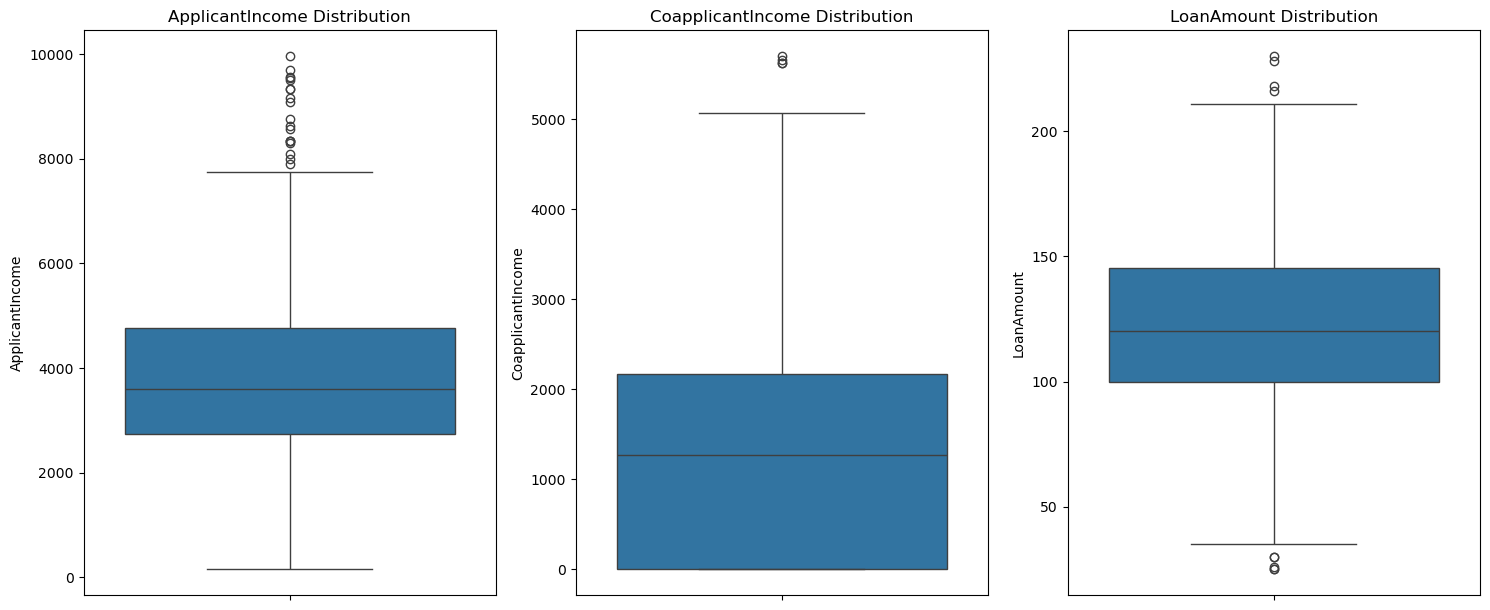

In [188]:
Numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
                

# Adjust figure size
plt.figure(figsize=(15, 12))  

for i, col in enumerate(Numeric_cols):
    plt.subplot(2, 3, i+1)  # Create subplots in a 3x3 grid
    sns.boxplot(data=df_clean, y=col)  # Add KDE for better distribution visualization
    plt.title(f'{col} Distribution')  # Title for each subplot
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

In [198]:
df.head(5)
df.shape

(549, 13)

In [ ]:
log traformation keep data and minimize outlier effect - to see

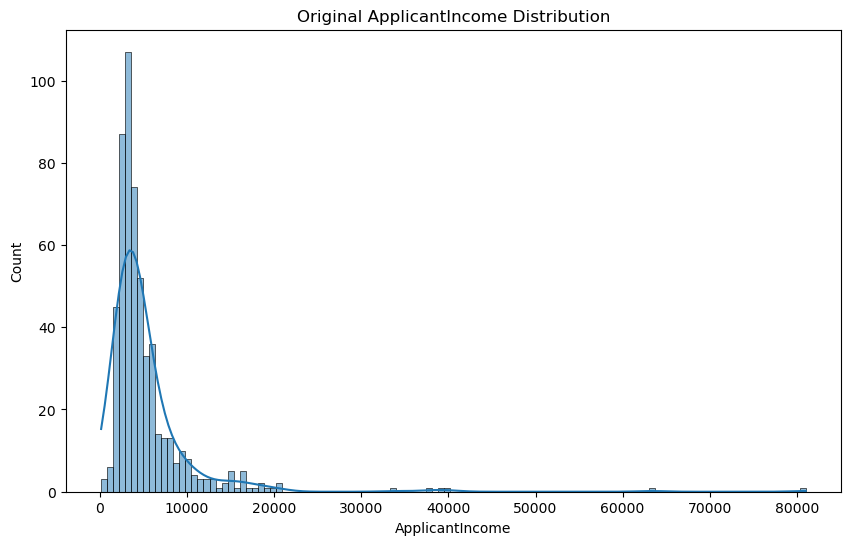

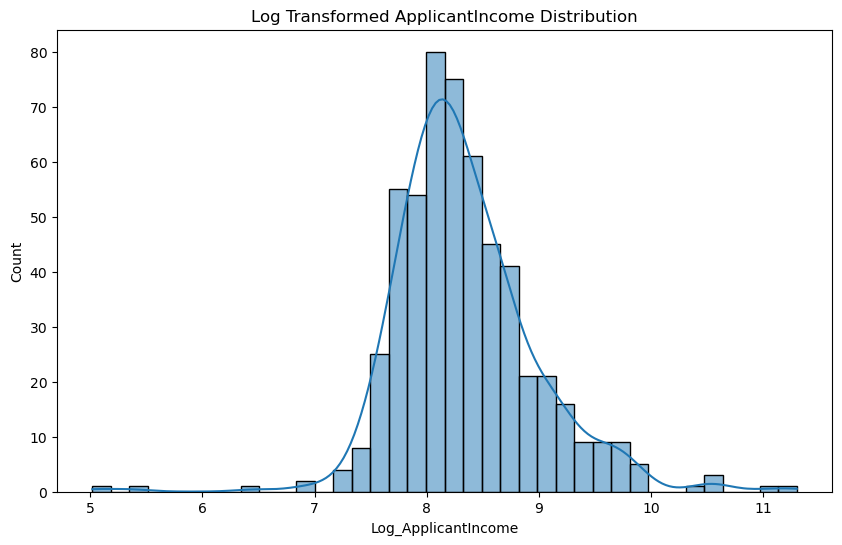

      Loan_ID  Gender Married  Dependents     Education Self_Employed  \
0    LP001002    Male      No           0      Graduate            No   
1    LP001003    Male     Yes           1      Graduate            No   
2    LP001005    Male     Yes           0      Graduate           Yes   
3    LP001006    Male     Yes           0  Not Graduate            No   
4    LP001008    Male      No           0      Graduate            No   
..        ...     ...     ...         ...           ...           ...   
609  LP002978  Female      No           0      Graduate            No   
610  LP002979    Male     Yes           4      Graduate            No   
611  LP002983    Male     Yes           1      Graduate            No   
612  LP002984    Male     Yes           2      Graduate            No   
613  LP002990  Female      No           0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       120.

In [200]:
# Visualizing original data distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title("Original ApplicantIncome Distribution")
plt.show()

# Log transformation (log(x + 1) to avoid log(0) issues)
df['Log_ApplicantIncome'] = np.log(df['ApplicantIncome'] + 1)

# Visualizing transformed data distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Log_ApplicantIncome'], kde=True)
plt.title("Log Transformed ApplicantIncome Distribution")
plt.show()

# Display the transformed DataFrame
print(df)


In [ ]:
# for all usnig loop

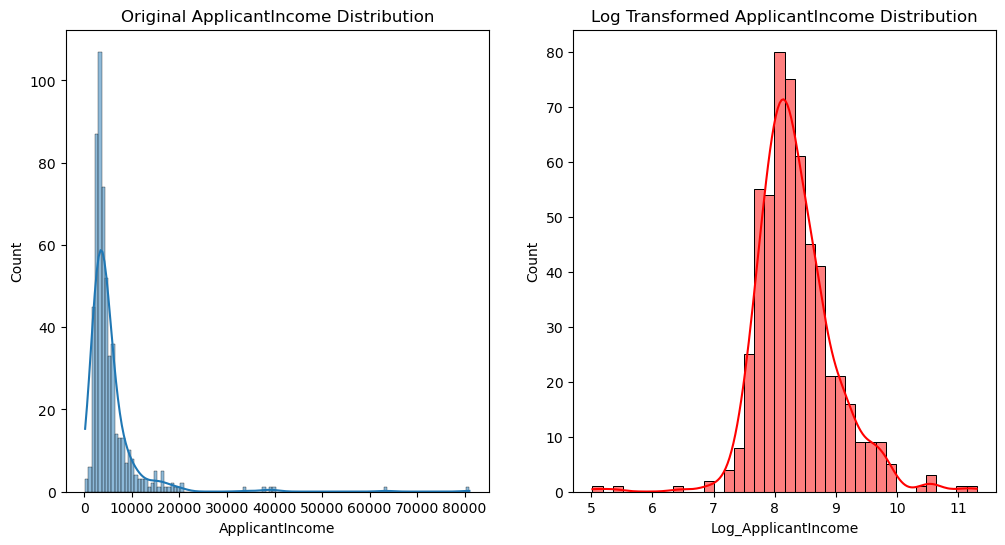

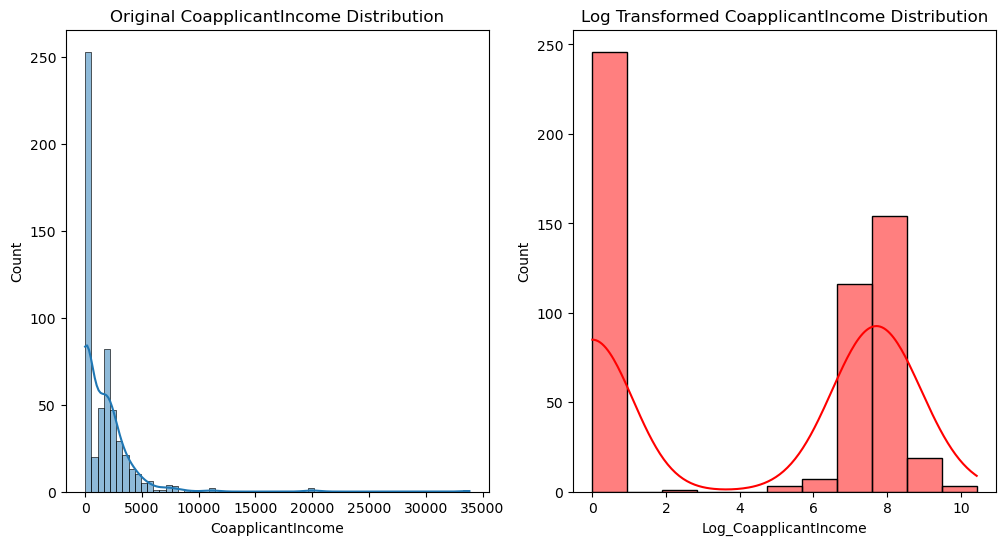

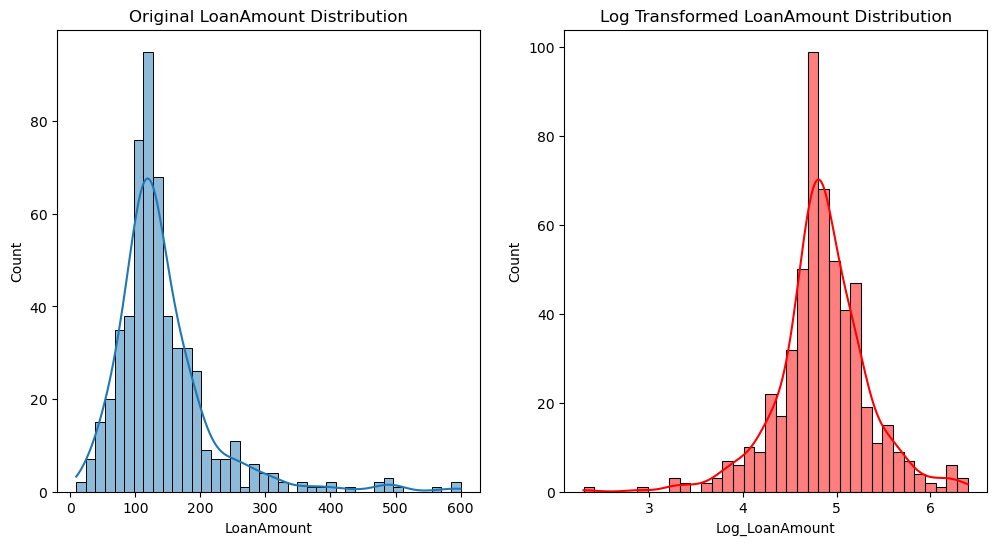

      Loan_ID  Gender Married  Dependents     Education Self_Employed  \
0    LP001002    Male      No           0      Graduate            No   
1    LP001003    Male     Yes           1      Graduate            No   
2    LP001005    Male     Yes           0      Graduate           Yes   
3    LP001006    Male     Yes           0  Not Graduate            No   
4    LP001008    Male      No           0      Graduate            No   
..        ...     ...     ...         ...           ...           ...   
609  LP002978  Female      No           0      Graduate            No   
610  LP002979    Male     Yes           4      Graduate            No   
611  LP002983    Male     Yes           1      Graduate            No   
612  LP002984    Male     Yes           2      Graduate            No   
613  LP002990  Female      No           0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       120.

In [204]:

# List of columns to apply log transformation to
columns_to_transform = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Loop through the columns and apply log transformation
for col in columns_to_transform:
    # Apply Log Transformation (log(x + 1)) to avoid log(0) issues
    df[f'Log_{col}'] = np.log(df[col] + 1)

# Visualizing the log transformation for all columns
for col in columns_to_transform:
    plt.figure(figsize=(12, 6))
    
    # Plot original vs log-transformed data
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Original {col} Distribution')
    
    plt.subplot(1, 2, 2)
    sns.histplot(df[f'Log_{col}'], kde=True, color='red')
    plt.title(f'Log Transformed {col} Distribution')
    
    plt.show()

# Display the transformed DataFrame
print(df)


In [202]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Log_ApplicantIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,8.430327
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.857094
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,8.699681


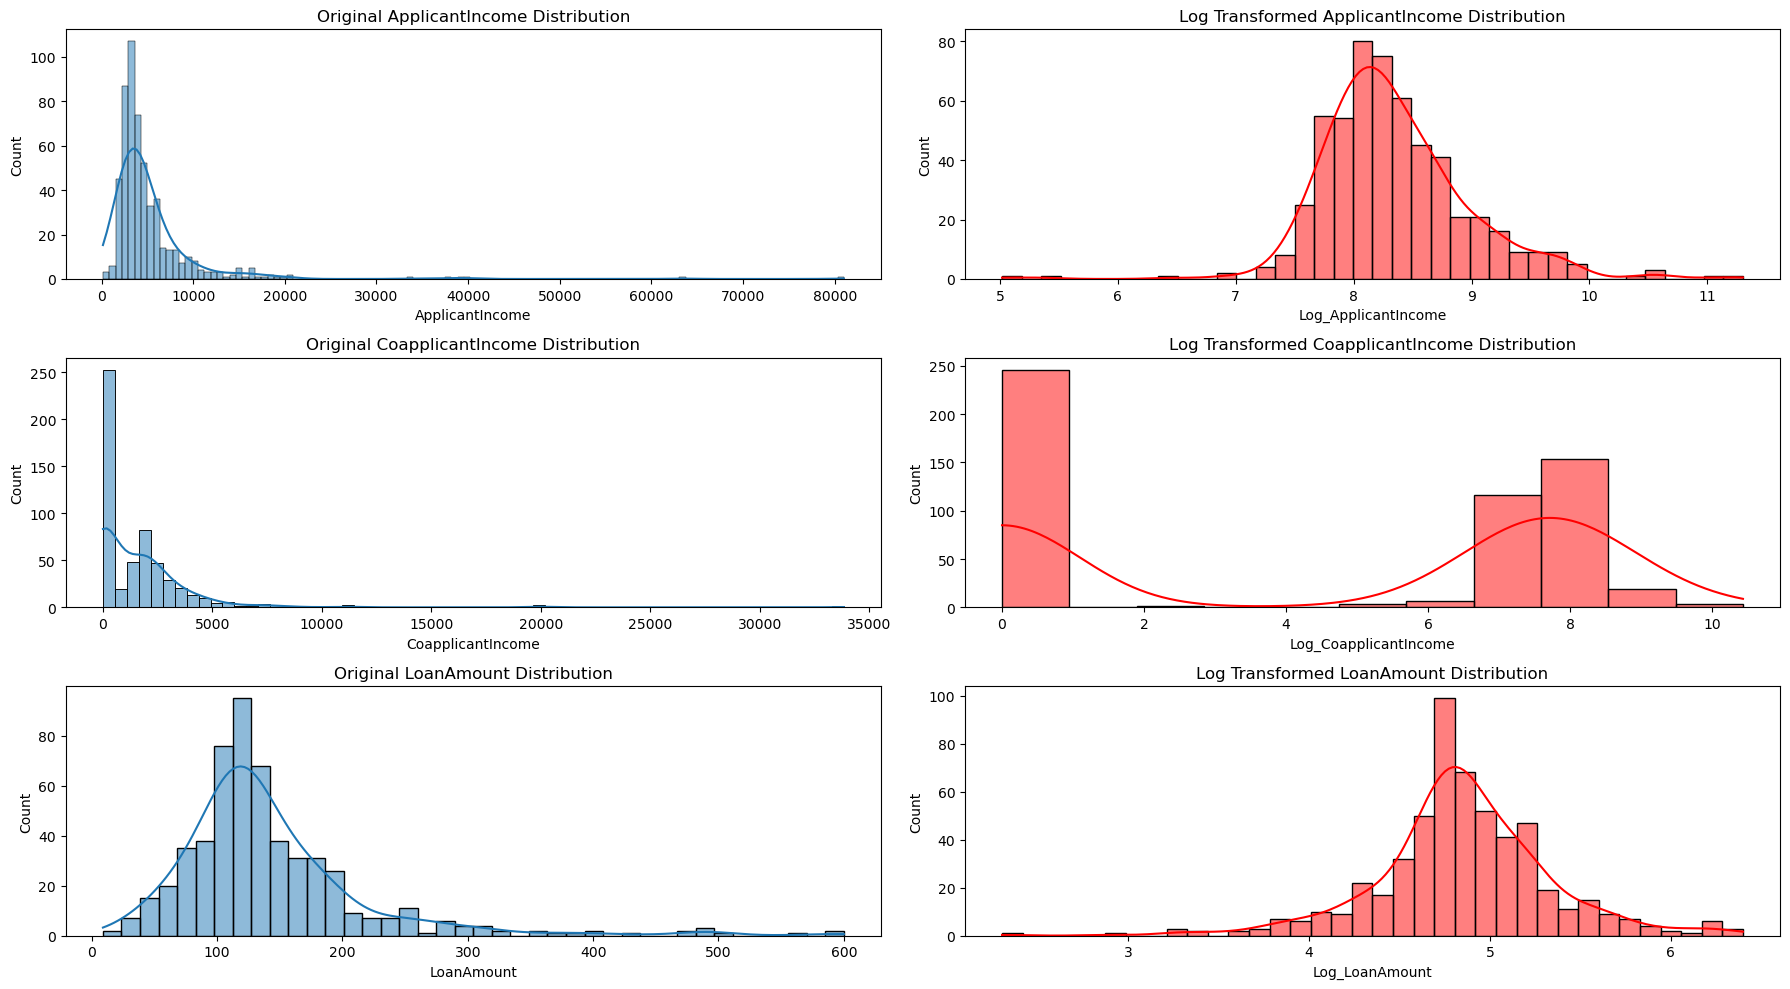

      Loan_ID  Gender Married  Dependents     Education Self_Employed  \
0    LP001002    Male      No           0      Graduate            No   
1    LP001003    Male     Yes           1      Graduate            No   
2    LP001005    Male     Yes           0      Graduate           Yes   
3    LP001006    Male     Yes           0  Not Graduate            No   
4    LP001008    Male      No           0      Graduate            No   
..        ...     ...     ...         ...           ...           ...   
609  LP002978  Female      No           0      Graduate            No   
610  LP002979    Male     Yes           4      Graduate            No   
611  LP002983    Male     Yes           1      Graduate            No   
612  LP002984    Male     Yes           2      Graduate            No   
613  LP002990  Female      No           0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       120.

In [214]:

# List of columns to apply log transformation to
columns_to_transform = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Apply log transformation and store results in new columns
for col in columns_to_transform:
    df[f'Log_{col}'] = np.log(df[col] + 1)

# Create a subplot grid
fig, axes = plt.subplots(3, 2, figsize=(18, 10))
axes = axes.flatten()  # Flatten the 2D axes array for easier indexing

# Loop to plot original and log-transformed data in a stacked manner
for idx, col in enumerate(columns_to_transform):
    # Plot original data
    sns.histplot(df[col], kde=True, ax=axes[2*idx])
    axes[2*idx].set_title(f'Original {col} Distribution')
    
    # Plot log-transformed data
    sns.histplot(df[f'Log_{col}'], kde=True, ax=axes[2*idx + 1], color='red')
    axes[2*idx + 1].set_title(f'Log Transformed {col} Distribution')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Display the transformed DataFrame
print(df)


In [ ]:
# labeling datasets

In [242]:
col = ['Loan_ID' , 'Gender' , 'Married', 'Education', 'Self_Employed' , 'Property_Area','Loan_Status']

for i in col:
     # Fit the encoder on the column and transform them to integers
    label_encoder = LabelEncoder()
    df[i] = label_encoder.fit_transform(df[i])

In [244]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Log_ApplicantIncome,Log_CoapplicantIncome,Log_LoanAmount
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1,8.674197,0.000000,4.795791
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,8.430327,7.319202,4.859812
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,8.006701,0.000000,4.204693
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,7.857094,7.765993,4.795791
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,8.699681,0.000000,4.955827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,544,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,7.972811,0.000000,4.276666
610,545,1,1,4,0,0,4106,0.0,40.0,180.0,1.0,0,1,8.320448,0.000000,3.713572
611,546,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,8.996280,5.484797,5.537334
612,547,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1,8.933796,0.000000,5.236442


In [ ]:
# training: using df dataset that has log transformation 

In [ ]:
x, y = SMOTE().fit_resample(x, y)


In [246]:
x= df.drop('Loan_Status', axis=1)

In [248]:
y= df['Loan_Status']

In [258]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Log_ApplicantIncome,Log_CoapplicantIncome,Log_LoanAmount
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,8.674197,0.000000,4.795791
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,8.430327,7.319202,4.859812
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,8.006701,0.000000,4.204693
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,7.857094,7.765993,4.795791
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,8.699681,0.000000,4.955827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,544,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,7.972811,0.000000,4.276666
610,545,1,1,4,0,0,4106,0.0,40.0,180.0,1.0,0,8.320448,0.000000,3.713572
611,546,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,8.996280,5.484797,5.537334
612,547,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,8.933796,0.000000,5.236442


In [252]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 549, dtype: int32

In [274]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming your data is already loaded into X (features) and y (target)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data to handle class imbalance
x_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(x_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution before SMOTE:", y_train.value_counts())
print("Class distribution after SMOTE:", y_train_resampled.value_counts())


Class distribution before SMOTE: Loan_Status
1    298
0    141
Name: count, dtype: int64
Class distribution after SMOTE: Loan_Status
0    298
1    298
Name: count, dtype: int64


In [276]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Check the shapes
print("X_train shape:", x.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", x_train.shape)

X_train shape: (549, 15)
X_test shape: (110, 15)
y_train shape: (439, 15)


In [278]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Function to compare classification models
def evaluate_classification_models(x, y, cv=5):
    # Define models
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Support Vector Machine': make_pipeline(StandardScaler(), SVC(probability=True)),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Naive Bayes': GaussianNB(),
    }

    results = []

    # Split data into train and test (inside the function)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    for name, model in models.items():
        try:
            # Train model
            model.fit(x_train, y_train)

            # Predictions
            y_train_pred = model.predict(x_train)
            y_test_pred = model.predict(x_test)

            # Cross-validation accuracy (on training set)
            cv_scores = cross_val_score(model, x_train, y_train, cv=cv, scoring='accuracy')
            cv_accuracy = np.mean(cv_scores)

            # Metrics
            accuracy = accuracy_score(y_test, y_test_pred)
            precision = precision_score(y_test, y_test_pred)  # Assuming binary classification (0,1)
            recall = recall_score(y_test, y_test_pred) 
            f1 = f1_score(y_test, y_test_pred)
            roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])  # ROC AUC score

            # Confusion Matrix
            conf_matrix = confusion_matrix(y_test, y_test_pred)

            # Store results
            results.append({
                'Model': name,
                'CV Accuracy': round(cv_accuracy, 4),
                'Test Accuracy': round(accuracy, 4),
                'Precision (Test)': round(precision, 4),
                'Recall (Test)': round(recall, 4),
                'F1 Score (Test)': round(f1, 4),
                'ROC AUC (Test)': round(roc_auc, 4),
                'Confusion Matrix': conf_matrix.tolist()  # Convert to list for easier viewing
            })

        except Exception as e:
            print(f"Model {name} failed: {e}")
    
    # Convert results list to DataFrame and sort by 'Test Accuracy'
    results_df = pd.DataFrame(results)
    return results_df.sort_values(by='Test Accuracy', ascending=False)

# Assuming your dataset is ready and has the following columns:
# 'Loan_Status' is the target column (1 for approved, 0 for not approved)
# Split your data (X and y) as follows:
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)  # Drop non-numeric columns
y = df['Loan_Status']  # Target column

# Run the evaluation function
results = evaluate_classification_models(X, y)

# Display the results
print(results)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

                    Model  CV Accuracy  Test Accuracy  Precision (Test)  \
0     Logistic Regression       0.8087         0.8273            0.8085   
1  Support Vector Machine       0.7996         0.8273            0.8021   
4           Random Forest       0.7950         0.8182            0.8202   
2           Decision Tree       0.7108         0.7909            0.8649   
5             Naive Bayes       0.7859         0.7909            0.8140   
3     K-Nearest Neighbors       0.6220         0.6000            0.6813   

   Recall (Test)  F1 Score (Test)  ROC AUC (Test)      Confusion Matrix  
0         0.9870           0.8889          0.7690   [[15, 18], [1, 76]]  
1         1.0000           0.8902          0.8249   [[14, 19], [0, 77]]  
4         0.9481           0.8795          0.8211   [[17, 16], [4, 73]]  
2         0.8312           0.8477          0.7641  [[23, 10], [13, 64]]  
5         0.9091           0.8589          0.6924   [[17, 16], [7, 70]]  
3         0.8052           0.7

In [ ]:
# finetunig model with parameters

In [280]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define the models and their hyperparameter grids
models_params = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
            'solver': ['liblinear', 'saga'],  # Solvers for optimization
            'penalty': ['l2']  # L2 regularization (default)
        }
    },
    'Support Vector Machine': {
        'model': make_pipeline(StandardScaler(), SVC(probability=True)),
        'params': {
            'svc__C': [0.1, 1, 10],  # Regularization parameter
            'svc__kernel': ['linear', 'rbf'],  # Kernel type (linear or non-linear)
            'svc__gamma': ['scale', 'auto'],  # Kernel coefficient (use 'scale' for automatic scaling)
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],  # Number of trees in the forest
            'max_depth': [10, 20, 30],  # Maximum depth of each tree
            'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
            'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
            'max_features': ['sqrt', 'log2']  # Number of features to consider for splitting
        }
    }
}

# Function to evaluate models and hyperparameters
def evaluate_model_with_grid_search(x_train, y_train, x_test, y_test, models_params):
    results = []
    
    for model_name, model_dict in models_params.items():
        print(f"Evaluating {model_name}...")
        
        model = model_dict['model']
        param_grid = model_dict['params']
        
        # Initialize GridSearchCV with cross-validation
        grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
        
        # Fit GridSearchCV to the training data
        grid_search.fit(x_train, y_train)
        
        # Get the best model from GridSearchCV
        best_model = grid_search.best_estimator_
        
        # Make predictions
        y_test_pred = best_model.predict(x_test)
        y_train_pred = best_model.predict(x_train)
        
        # Evaluate metrics
        accuracy = accuracy_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred)
        recall = recall_score(y_test, y_test_pred)
        f1 = f1_score(y_test, y_test_pred)
        roc_auc = roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])
        conf_matrix = confusion_matrix(y_test, y_test_pred)
        
        results.append({
            'Model': model_name,
            'Best Hyperparameters': grid_search.best_params_,
            'Test Accuracy': round(accuracy, 4),
            'Precision (Test)': round(precision, 4),
            'Recall (Test)': round(recall, 4),
            'F1 Score (Test)': round(f1, 4),
            'ROC AUC (Test)': round(roc_auc, 4),
            'Confusion Matrix': conf_matrix.tolist()
        })
    
    return pd.DataFrame(results).sort_values(by='Test Accuracy', ascending=False)

# Assuming your data is ready (X and y)
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run the evaluation function
results = evaluate_model_with_grid_search(x_train, y_train, x_test, y_test, models_params)

# Display the results
print(results)


Evaluating Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Evaluating Support Vector Machine...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Evaluating Random Forest...
Fitting 5 folds for each of 162 candidates, totalling 810 fits
                    Model                               Best Hyperparameters  \
0     Logistic Regression   {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}   
1  Support Vector Machine  {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__k...   
2           Random Forest  {'max_depth': 10, 'max_features': 'sqrt', 'min...   

   Test Accuracy  Precision (Test)  Recall (Test)  F1 Score (Test)  \
0         0.7727            0.7474         0.9861           0.8503   
1         0.7727            0.7474         0.9861           0.8503   
2         0.7636            0.7447         0.9722           0.8434   

   ROC AUC (Test)     Confusion Matrix  
0          0.6981  [[14, 24], [1, 71]]  
1          0.7080  [[14, 24], [1

In [282]:
from sklearn.ensemble import VotingClassifier

# Define base models
lr = LogisticRegression(C=1, penalty='l2', solver='liblinear')
svm = SVC(C=0.1, kernel='rbf', gamma='scale', probability=True)
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10)

# Create voting classifier
voting_clf = VotingClassifier(estimators=[('lr', lr), ('svm', svm), ('rf', rf)], voting='hard')

# Fit the model
voting_clf.fit(x_train, y_train)

# Make predictions
y_pred = voting_clf.predict(x_test)

# Evaluate the performance
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, y_pred)}")


Voting Classifier Accuracy: 0.7727272727272727


In [284]:
param_grid_rf = {
    'n_estimators': [200, 300, 500],  # Increase the number of trees
    'max_depth': [10, 20, 40],  # Experiment with deeper trees
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_rf.fit(x_train, y_train)

best_rf_model = grid_search_rf.best_estimator_
print(f"Best Random Forest Parameters: {grid_search_rf.best_params_}")

# Evaluate the best model
y_pred_rf = best_rf_model.predict(x_test)
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, y_pred_rf)}")


Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Test Accuracy: 0.7636363636363637


In [286]:
from xgboost import XGBClassifier

# Initialize XGBoost model
xgb = XGBClassifier(random_state=42)
xgb.fit(x_train, y_train)

# Evaluate XGBoost performance
y_pred_xgb = xgb.predict(x_test)
print(f"XGBoost Test Accuracy: {accuracy_score(y_test, y_pred_xgb)}")


XGBoost Test Accuracy: 0.7363636363636363
